In [1]:
# MULTICLASS CLASSIFICATION #
#Which party a person is going to vote for?
# 1.Democratic, 2.Republican, 3.Independent 

In [2]:
#Identify hand written digits recognition: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [4]:
#What is digit dataset in python:
#This dataset is made up of 1797 8x8 images. 
#Each image, like the one shown below, is of a hand-written digit.
#In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.

In [5]:
digits = load_digits()

In [6]:
#See what this training set contain:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
#See the firs element of this set as numaric data:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

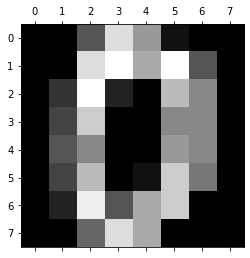

In [10]:
#See this particular element which is zero:
plt.gray()
plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

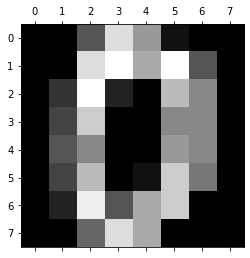

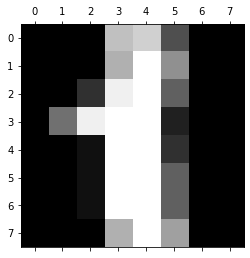

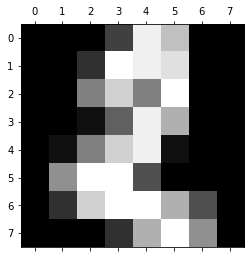

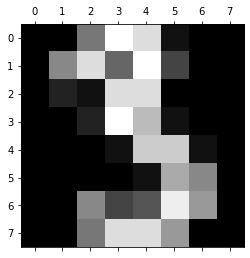

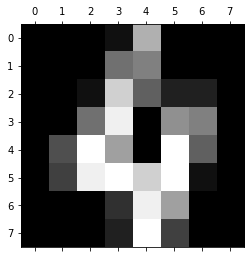

In [15]:
#See first five elements of this set as images:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [17]:
#Check the target five elements: 
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [18]:
#We need to data and the target to train our model.
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [21]:
len(X_train)

1437

In [22]:
len(X_test)

360

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
#TO AVOID ITERATION REACHED LIMIT WARNING: 
model = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

In [28]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [30]:
#Model accuracy is 96%
model.score(X_test, y_test)

0.9638888888888889

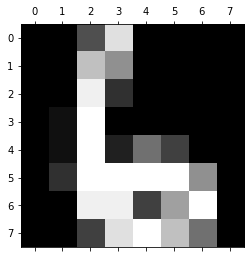

In [31]:
#Let's pick a random sample:
plt.matshow(digits.images[67])

In [32]:
#See actually what is this:
digits.target[67]

6

In [34]:
#Make predict for 67th element with our model:
model.predict([digits.data[67]])

array([6])

In [36]:
#CONFUSION MATRIX#
#You check where is your model cannot work accurately:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 35,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 35,  1,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  1, 34,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 35]], dtype=int64)

Text(69.0, 0.5, 'Truth')

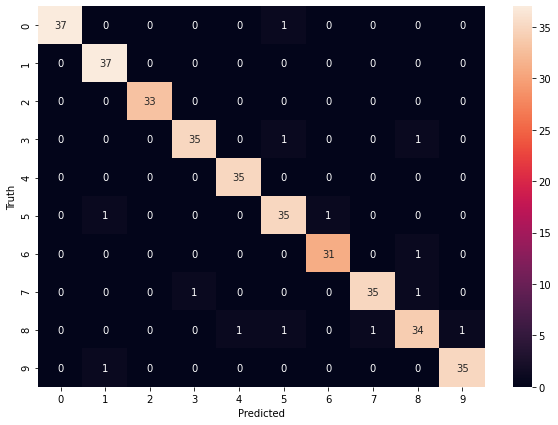

In [37]:
#Visualize the model's confusion matrix:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")